In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [3]:
excel_input="C:/Users/Eduar/Desktop/Output_file.xlsx"
data_input=pd.read_excel(excel_input, sheet_name=0)
data_input

,divipola_n,name,year,Hydrogen,E_Methanol,Bio_Methanol,Bio_E_Methanol,Peak Value,Factor,Feedstock_price,...,Electrolizer Capex %E,Captured CO2 %E,Digestor Capex %B,Methanol Capex %B,Feedstsck %B,Methanol Capex %B_E,Feedstsck %B_E,Additional H2 %B_E,ElectrolyzerUse,result
0,5,Antioquia,2015,6.727939,12.317882,0.631771,0.540885,1090.69,0.738597,0.01,...,7.664083,1.103301,0.012124,83.196937,5.107109,83.196937,5.107109,0,29.405975,0.540885
1,76,Valle del Cauca,2015,7.228128,12.818070,0.631771,0.540885,1152.27,0.768157,0.01,...,8.704290,1.060247,0.012124,83.196937,5.107109,83.196937,5.107109,0,24.881455,0.540885
2,76,Valle del Cauca,2015,9.667954,15.257896,0.631771,0.540885,1110.85,0.822946,0.01,...,9.147838,0.890708,0.012124,83.196937,5.107109,83.196937,5.107109,0,19.889261,0.540885
3,68,Santander,2015,7.478845,13.068788,0.631771,0.540885,1655.40,0.843701,0.01,...,8.609092,1.039907,0.012124,83.196937,5.107109,83.196937,5.107109,0,24.673976,0.540885
4,52,Narino,2015,13.391004,18.980947,0.631771,0.540885,1134.50,0.874751,0.01,...,9.881127,0.715998,0.012124,83.196937,5.107109,83.196937,5.107109,0,14.801558,0.540885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Amazonas,2015,7.787805,13.377748,1.128995,0.789498,1533.54,0.839528,0.10,...,8.408867,1.015890,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.678077,0.789498
90,91,Amazonas,2015,7.570488,13.160431,1.128995,0.789498,1063.87,0.763731,0.10,...,8.453474,1.032666,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.953213,0.789498
91,97,Vaupes,2015,7.424522,13.014465,1.128995,0.789498,1061.67,0.757820,0.10,...,8.538607,1.044248,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.981497,0.789498
92,97,Vaupes,2015,7.483272,13.073215,1.128995,0.789498,1064.55,0.760643,0.10,...,8.505247,1.039555,0.008306,56.998264,34.988832,56.998264,34.988832,0,24.966774,0.789498


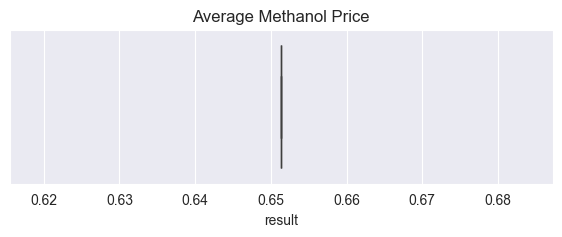

In [4]:
# Create a box plot
plt.figure(figsize=(7,2)) # Size
plt.title('Average Methanol Price')
sns.boxplot(data=None, x=data_input['result'],fliersize=1, showfliers=False)
plt.savefig("C:/Users/Eduar/Desktop/images_report/Avg Methanol Prixe.png")

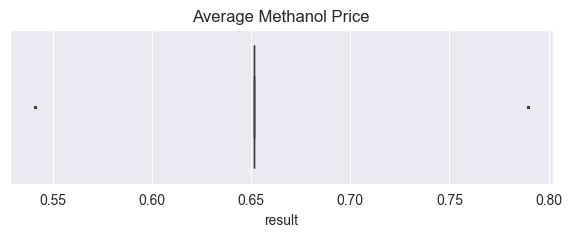

In [5]:
# Create a box plot
plt.figure(figsize=(7,2)) # Size
plt.title('Average Methanol Price')
sns.boxplot(data=None, x=data_input['result'],fliersize=1, showfliers=True)
plt.savefig("C:/Users/Eduar/Desktop/images_report/Avg Methanol Prixe outliers.png")

(0.5, 0.6]    15
(0.6, 0.7]    65
(0.7, 0.8]    14
Name: result, dtype: int64


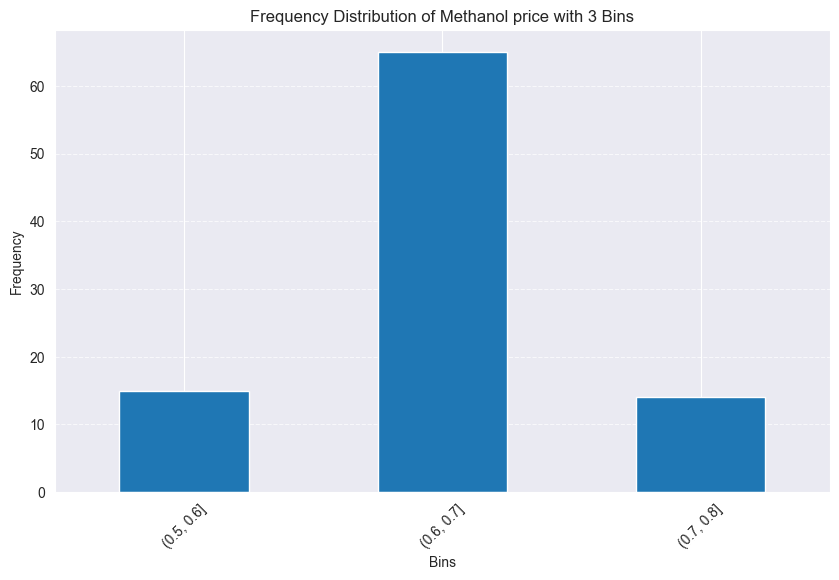

In [6]:
# Define bins for the frequency distribution
# Define the number of bins
n_bins = 3

# Step 1: Create the bins
bins = pd.cut(data_input['result'], bins=n_bins, precision=1)

# Step 2: Calculate the frequency distribution
frequency_distribution = bins.value_counts().sort_index()

# Display the frequency distribution
print(frequency_distribution)

# Step 3: Plot the distribution (optional)
frequency_distribution.plot(kind='bar', figsize=(10, 6))
plt.title(f'Frequency Distribution of Methanol price with {n_bins} Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("C:/Users/Eduar/Desktop/images_report/Frequency Distribution.png")
plt.show()

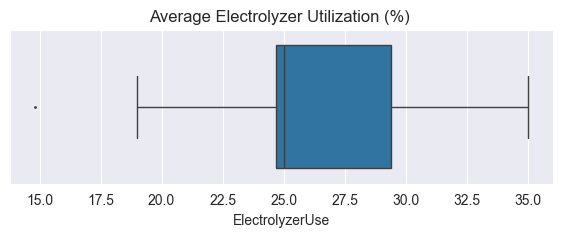

In [7]:
# Create a box plot
plt.figure(figsize=(7,2)) # Size
plt.title('Average Electrolyzer Utilization (%) ')
sns.boxplot(data=None, x=data_input['ElectrolyzerUse'],fliersize=1, showfliers=True)
plt.savefig("C:/Users/Eduar/Desktop/images_report/Electrolyzer Use %.png")

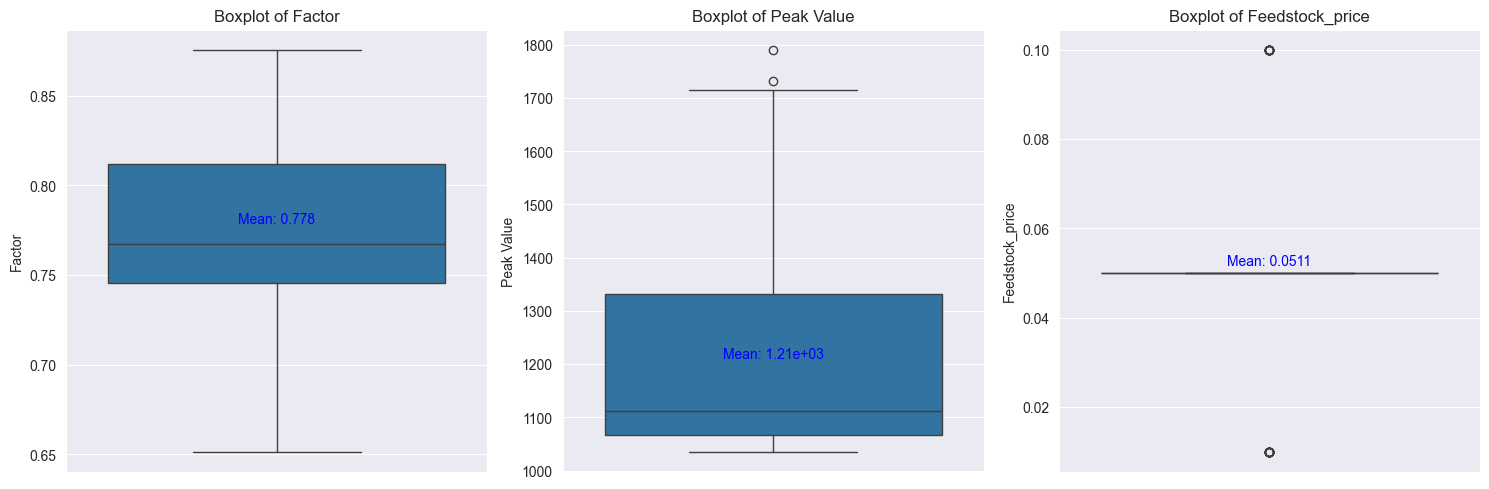

In [9]:
# Selecting specific columns to plot
columns_to_plot = ['Factor', 'Peak Value', 'Feedstock_price']

# Number of subplots
num_plots = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot each column in a different subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_input, y=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel(column)
    
    mean_value = data_input[column].mean()
    axs[i].text(0, mean_value, f'Mean: {mean_value:.3g}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue')

    # Calculate and annotate the median value
    #median_value = df[column].median()
    #plt.text(0.5, median_value, f'Median: {median_value}', horizontalalignment='center', verticalalignment='bottom', fontsize=5, color='blue')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("C:/Users/Eduar/Desktop/images_report/variable input distribution.png")
# Show the plot
plt.show()

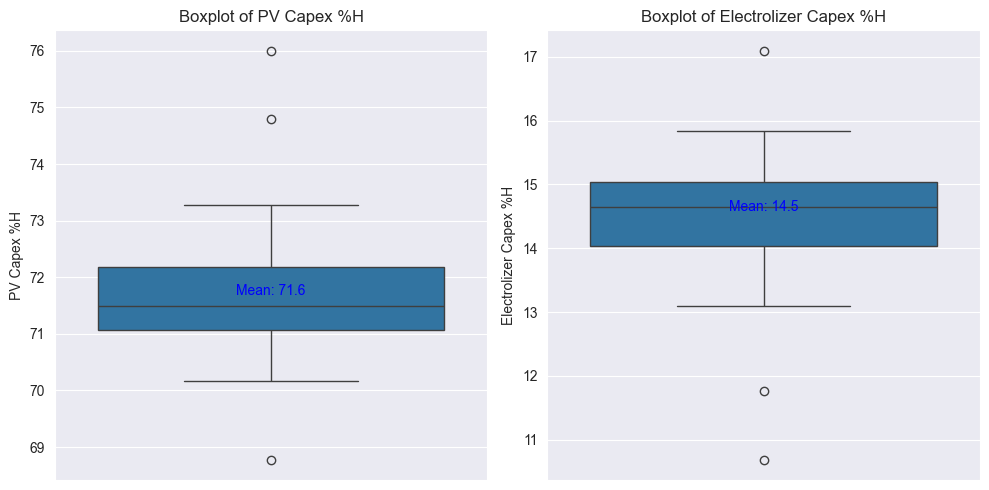

In [10]:

columns_to_plot = [data_input.columns[10], data_input.columns[12]]

# Number of subplots
num_plots = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot each column in a different subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_input, y=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel(column)
    mean_value = data_input[column].mean()
    axs[i].text(0, mean_value, f'Mean: {mean_value:.3g}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("C:/Users/Eduar/Desktop/images_report/cost H.png")
# Show the plot
plt.show()

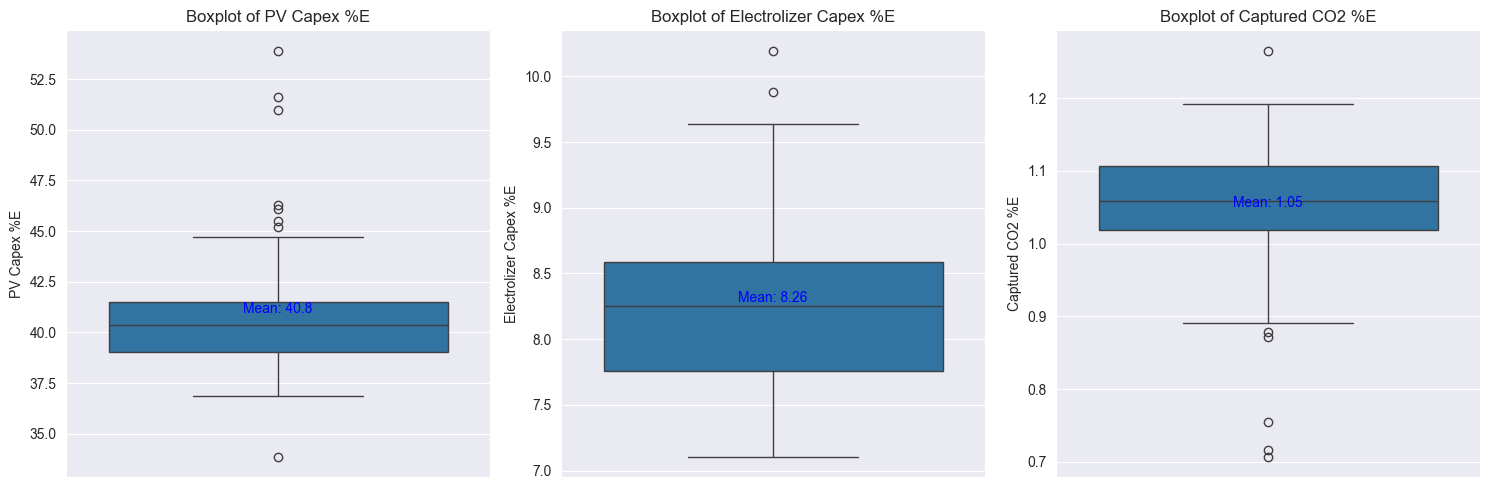

In [11]:


columns_to_plot = [data_input.columns[13], data_input.columns[15], data_input.columns[16]]

# Number of subplots
num_plots = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot each column in a different subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_input, y=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel(column)
    mean_value = data_input[column].mean()
    axs[i].text(0, mean_value, f'Mean: {mean_value:.3g}', horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("C:/Users/Eduar/Desktop/images_report/cost E.png")
# Show the plot
plt.show()

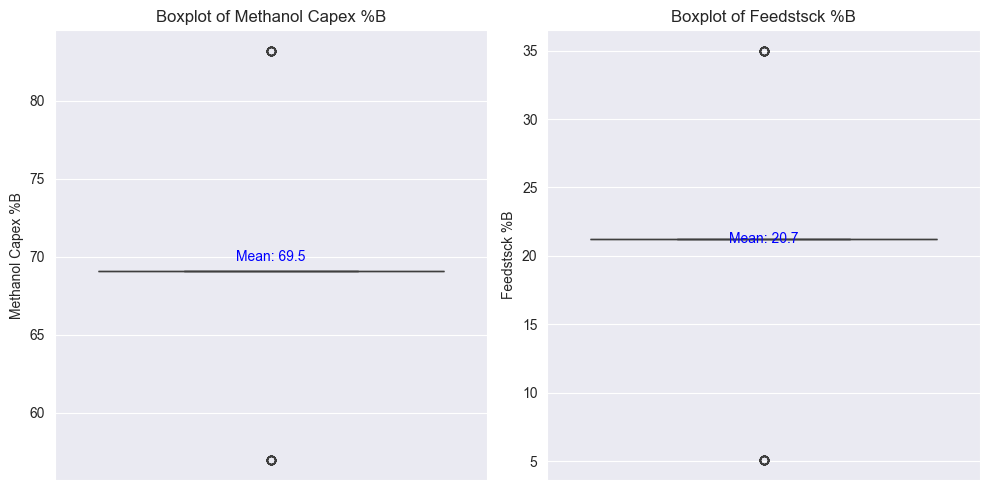

In [12]:
columns_to_plot = [data_input.columns[18], data_input.columns[19]]

# Number of subplots
num_plots = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot each column in a different subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_input, y=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel(column)
    mean_value = data_input[column].mean()
    axs[i].text(0, mean_value, f'Mean: {mean_value:.3g}', horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("C:/Users/Eduar/Desktop/images_report/cost B.png")
# Show the plot
plt.show()

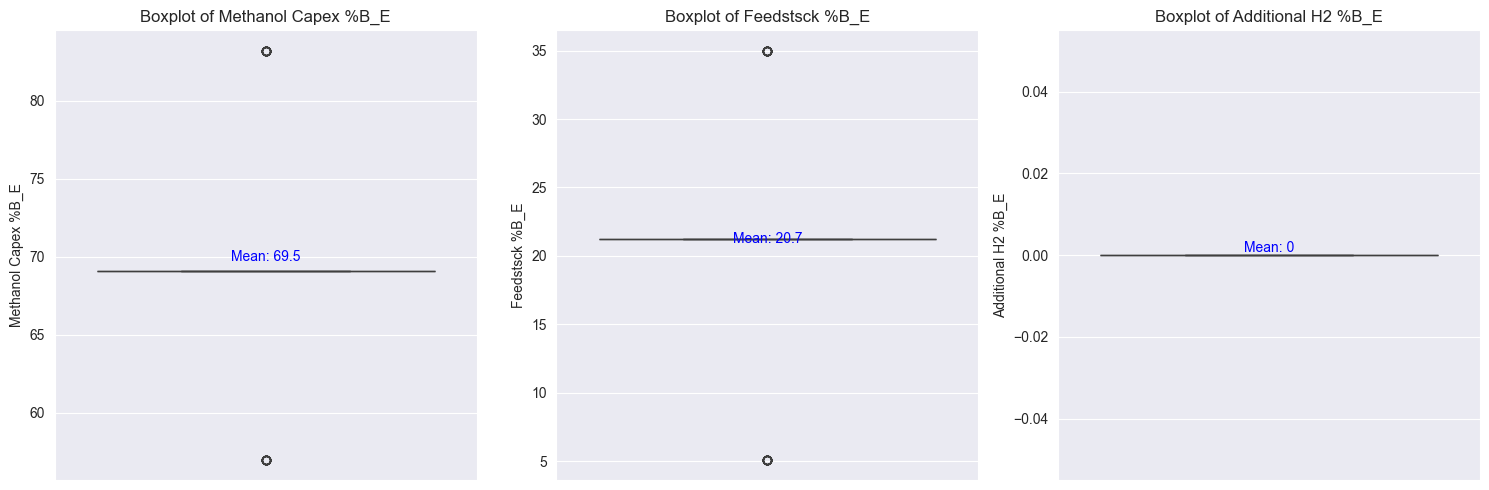

In [13]:
columns_to_plot = [data_input.columns[20],data_input.columns[21], data_input.columns[22]]

# Number of subplots
num_plots = len(columns_to_plot)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot each column in a different subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_input, y=column, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_ylabel(column)
    mean_value = data_input[column].mean()
    axs[i].text(0, mean_value, f'Mean: {mean_value:.3g}', horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("C:/Users/Eduar/Desktop/images_report/cost BE.png")
# Show the plot
plt.show()

In [14]:
df_out=data_input[['divipola_n', 'name', 'E_Methanol', 'Bio_Methanol', 'Bio_E_Methanol', 'Peak Value', 'ElectrolyzerUse', 'result' ]]

df=data_input[['Peak Value', 'Factor', 'Feedstock_price', 'result' ]]
df

,Peak Value,Factor,Feedstock_price,result
0,1090.69,0.738597,0.01,0.540885
1,1152.27,0.768157,0.01,0.540885
2,1110.85,0.822946,0.01,0.540885
3,1655.40,0.843701,0.01,0.540885
4,1134.50,0.874751,0.01,0.540885
...,...,...,...,...
89,1533.54,0.839528,0.10,0.789498
90,1063.87,0.763731,0.10,0.789498
91,1061.67,0.757820,0.10,0.789498
92,1064.55,0.760643,0.10,0.789498


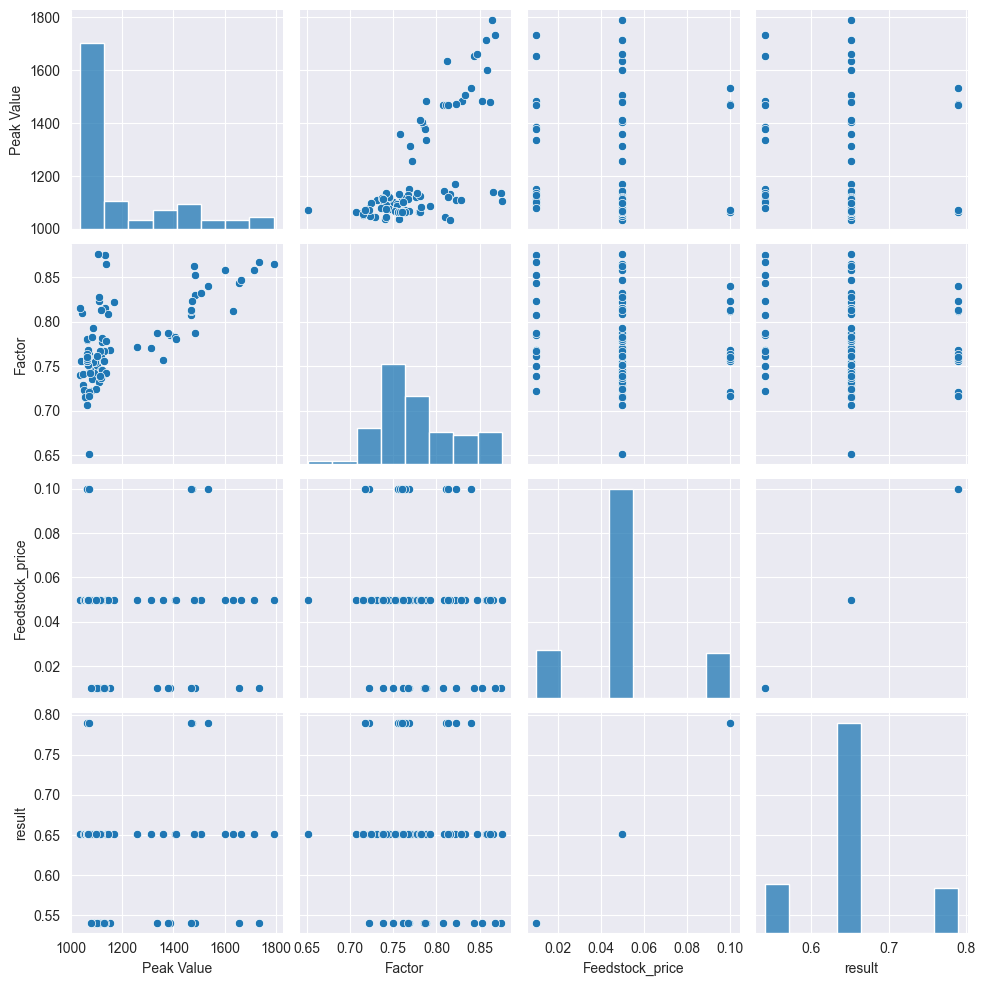

In [15]:
sns.pairplot(df)
plt.savefig("C:/Users/Eduar/Desktop/images_report/Pair Diagram.png")

In [32]:

# Select the independent variables
X = df[['Peak Value', 'Factor', 'Feedstock_price']]

# Create polynomial features
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term
X_poly_df = sm.add_constant(X_poly_df)

# Define the dependent variable
y = df['result']

# Fit the model
model = sm.OLS(y, X_poly_df).fit()
y_pred0 = model.predict(X_poly_df)
# Print the model summary
summary = model.summary()
with open('C:/Users/Eduar/Desktop/images_report/Output.txt', "w") as file:
    # Write the summary as a string to the file
    file.write(summary.as_text())
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.383e+30
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:14:46   Log-Likelihood:                 3219.8
No. Observations:                  94   AIC:                            -6432.
Df Residuals:                      90   BIC:                            -6421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5133    6.5e-16    7


# Select the independent variables
X = df[['Peak Value', 'Factor', 'Feedstock_price']]

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term
X_poly_df = sm.add_constant(X_poly_df)

terms_to_exclude = [
    'const',
    'Factor^2',
    'Factor Feedstock_price',
    'Peak Value Feedstock_price',
    'Feedstock_price^2',
    'Peak Value^2'
]
X_poly_df = X_poly_df.drop(columns=terms_to_exclude, errors='ignore')

# Define the dependent variable
y = df['result']

# Fit the model
model = sm.OLS(y, X_poly_df).fit()
y_pred = model.predict(X_poly_df)
# Print the model summary
summary = model.summary()
with open('C:/Users/Eduar/Desktop/images_report/Output.txt', "w") as file:
    # Write the summary as a string to the file
    file.write(summary.as_text())
print(model.summary())

In [27]:

# Select the independent variables
X = df[['Peak Value', 'Factor', 'Feedstock_price']]

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term
X_poly_df = sm.add_constant(X_poly_df)

terms_to_exclude = [
    'const',
    'Peak Value',
    'Factor',
    'Factor^2',
    'Factor Feedstock_price',
    'Peak Value Factor',
    'Peak Value Feedstock_price',
    'Feedstock_price^2',
    'Peak Value^2'
]
X_poly_df = X_poly_df.drop(columns=terms_to_exclude, errors='ignore')

# Define the dependent variable
y = df['result']

# Fit the model
model = sm.OLS(y, X_poly_df).fit()
y_pred2 = model.predict(X_poly_df)
# Print the model summary
summary = model.summary()
with open('C:/Users/Eduar/Desktop/images_report/Output_onlyFeedstockprice.txt', "w") as file:
    # Write the summary as a string to the file
    file.write(summary.as_text())
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 result   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              695.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                    5.84e-45
Time:                        17:13:53   Log-Likelihood:                          6.4558
No. Observations:                  94   AIC:                                     -10.91
Df Residuals:                      93   BIC:                                     -8.368
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [30]:
X = df[['Peak Value', 'Factor', 'Feedstock_price']]
y = df['result']

# Scale specific features: 'Peak Value' and 'Feedstock_price'
scaler = StandardScaler()
X = X.copy()
X.loc[:, ['Peak Value', 'Feedstock_price']] = scaler.fit_transform(X[['Peak Value', 'Feedstock_price']])

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term
X_poly_df = sm.add_constant(X_poly_df)

# Exclude specific terms
terms_to_exclude = [
    'const',
    'Factor^2',
    'Factor Feedstock_price',
    'Peak Value^2',
    'Peak Value Factor',
    'Peak Value Feedstock_price',
    'Feedstock_price^2'
]
X_poly_df = X_poly_df.drop(columns=terms_to_exclude, errors='ignore')

# Fit the model using OLS with Newey-West standard errors
model = sm.OLS(y, X_poly_df).fit(cov_type='HAC', cov_kwds={'maxlags':1})
y_pred = model.predict(X_poly_df)

# Print the model summary
summary = model.summary()
with open('C:/Users/Eduar/Desktop/images_report/Output_Newey_West.txt', "w") as file:
    # Write the summary as a string to the file
    file.write(summary.as_text())
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 result   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.909e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                   1.54e-135
Time:                        18:13:34   Log-Likelihood:                          202.20
No. Observations:                  94   AIC:                                     -398.4
Df Residuals:                      91   BIC:                                     -390.8
Df Model:                           3                                                  
Covariance Type:                  HAC                                                  
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

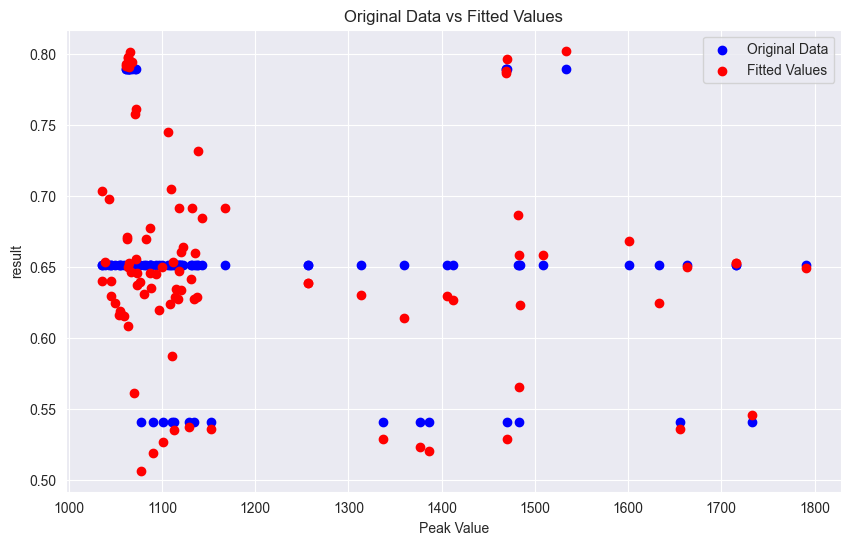

In [17]:
# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(df['Peak Value'], y, color='blue', label='Original Data')
plt.scatter(df['Peak Value'], y_pred, color='red', label='Fitted Values')
plt.xlabel('Peak Value')
plt.ylabel('result')
plt.legend()
plt.title('Original Data vs Fitted Values')
plt.savefig("C:/Users/Eduar/Desktop/images_report/Original vs Fitted Peak Value.png")
plt.show()

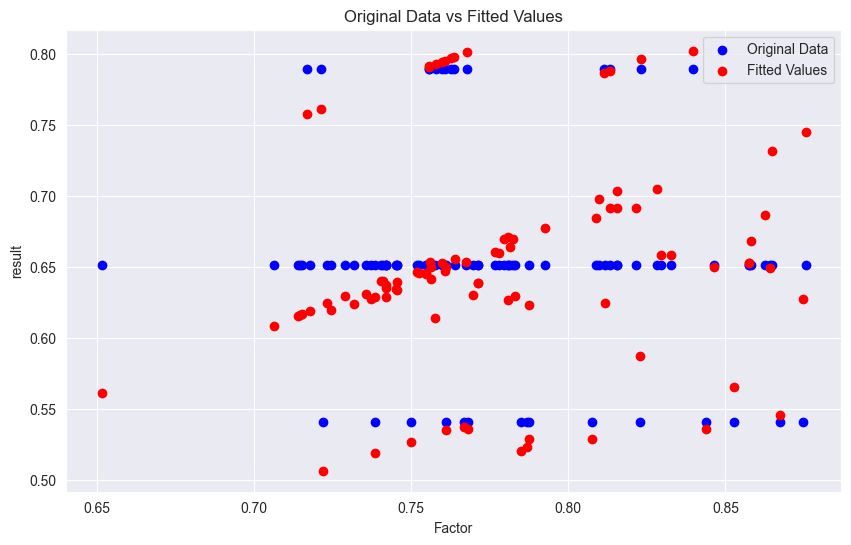

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Factor'], y, color='blue', label='Original Data')
plt.scatter(df['Factor'], y_pred, color='red', label='Fitted Values')
plt.xlabel('Factor')
plt.ylabel('result')
plt.legend()
plt.title('Original Data vs Fitted Values')
plt.savefig("C:/Users/Eduar/Desktop/images_report/Original vs Fitted Factor.png")
plt.show()

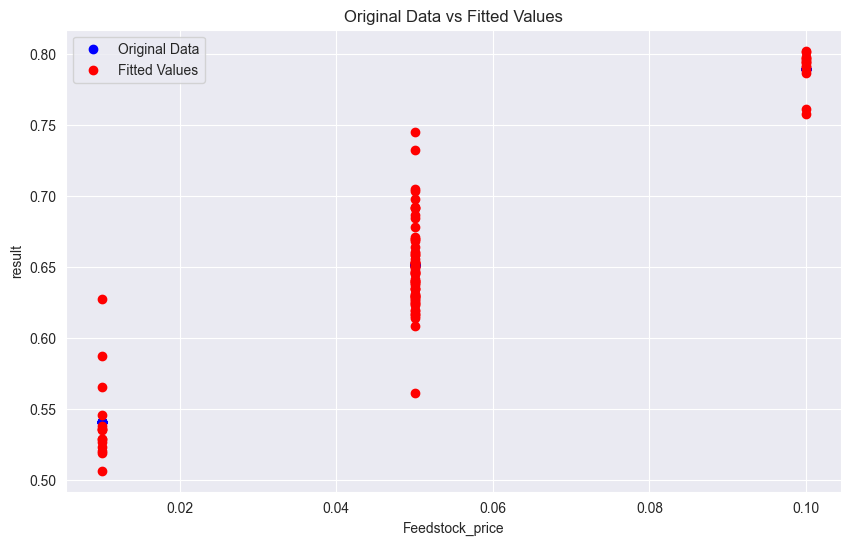

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Feedstock_price'], y, color='blue', label='Original Data')
plt.scatter(df['Feedstock_price'], y_pred, color='red', label='Fitted Values')
plt.xlabel('Feedstock_price')
plt.ylabel('result')
plt.legend()
plt.title('Original Data vs Fitted Values')
plt.savefig("C:/Users/Eduar/Desktop/images_report/Original vs Fitted Feedstock price.png")
plt.show()

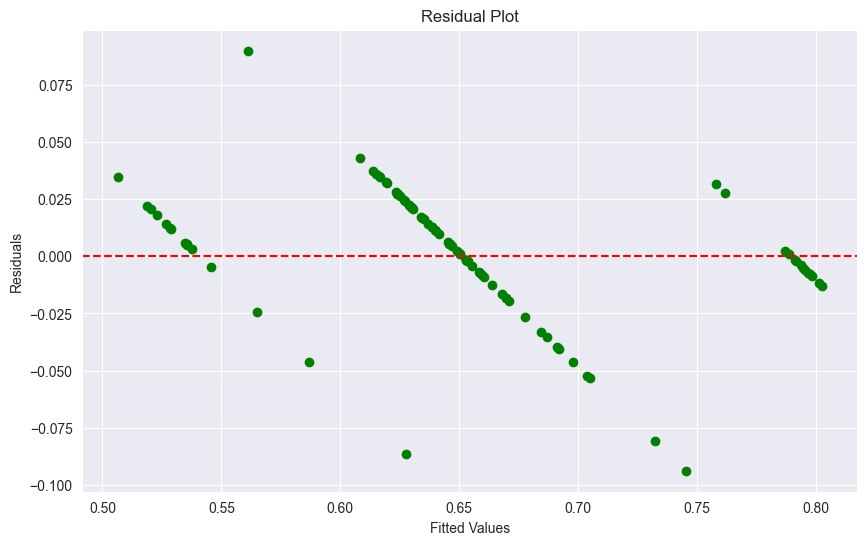

In [20]:

# Residual plot
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig("C:/Users/Eduar/Desktop/images_report/Residuals plot.png")
plt.show()

In [21]:
# Sensitivity Analysis
def sensitivity_analysis(model, X, feature_names, baseline_values, change=0.01):
    sensitivities = {}
    for i, feature in enumerate(feature_names):
        # Create a copy of the baseline values
        modified_values = baseline_values.copy()
        
        # Modify the value of the current feature
        modified_values[i] += modified_values[i] * change
        
        # Calculate the predicted change in the dependent variable
        predicted_baseline = model.predict([baseline_values])[0]
        predicted_modified = model.predict([modified_values])[0]
        
        # Calculate sensitivity as the percentage change in the dependent variable
        sensitivity = (predicted_modified - predicted_baseline) / predicted_baseline * 100
        
        sensitivities[feature] = sensitivity
    
    return sensitivities


Sensitivity Analysis Results (1% change in features):
Peak Value: 0.00%
Factor: 1.00%
Feedstock_price: 0.00%


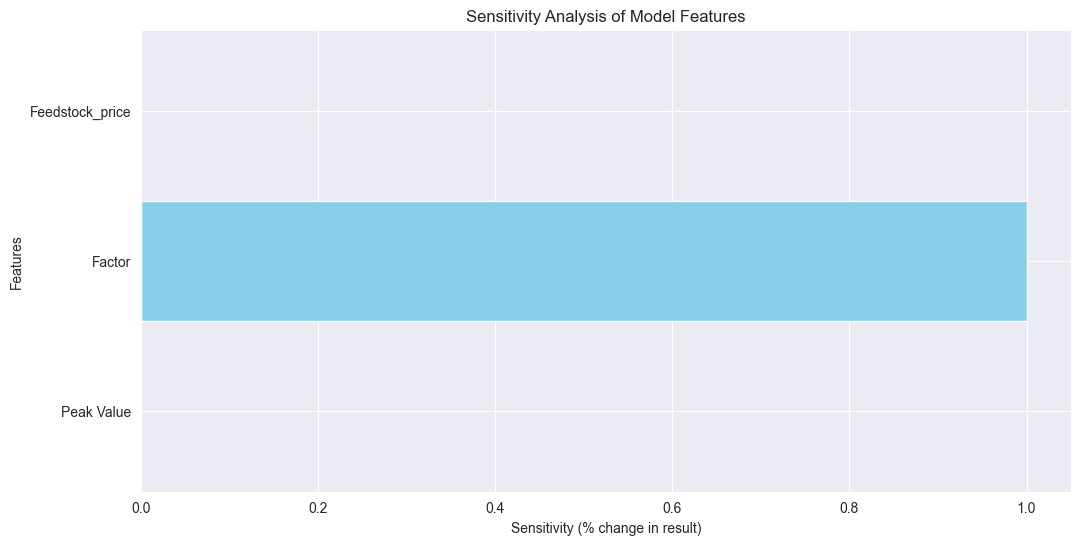

In [22]:

# Get the baseline values (mean of each feature)
baseline_values = X_poly_df.mean().values

# Perform sensitivity analysis
sensitivities = sensitivity_analysis(model, X_poly_df, X_poly_df.columns, baseline_values)

# Print the sensitivity results
print("\nSensitivity Analysis Results (1% change in features):")
for feature, sensitivity in sensitivities.items():
    print(f"{feature}: {sensitivity:.2f}%")

# Optional: Visualize Sensitivity
features = list(sensitivities.keys())
values = list(sensitivities.values())

plt.figure(figsize=(12, 6))
plt.barh(features, values, color='skyblue')
plt.xlabel('Sensitivity (% change in result)')
plt.ylabel('Features')
plt.title('Sensitivity Analysis of Model Features')
plt.savefig("C:/Users/Eduar/Desktop/images_report/sensibility analysis.png")
plt.show()


Sensitivity Analysis Results (1% change in features):
Peak Value: 0.05%
Factor: 1.21%
Feedstock_price: -0.26%


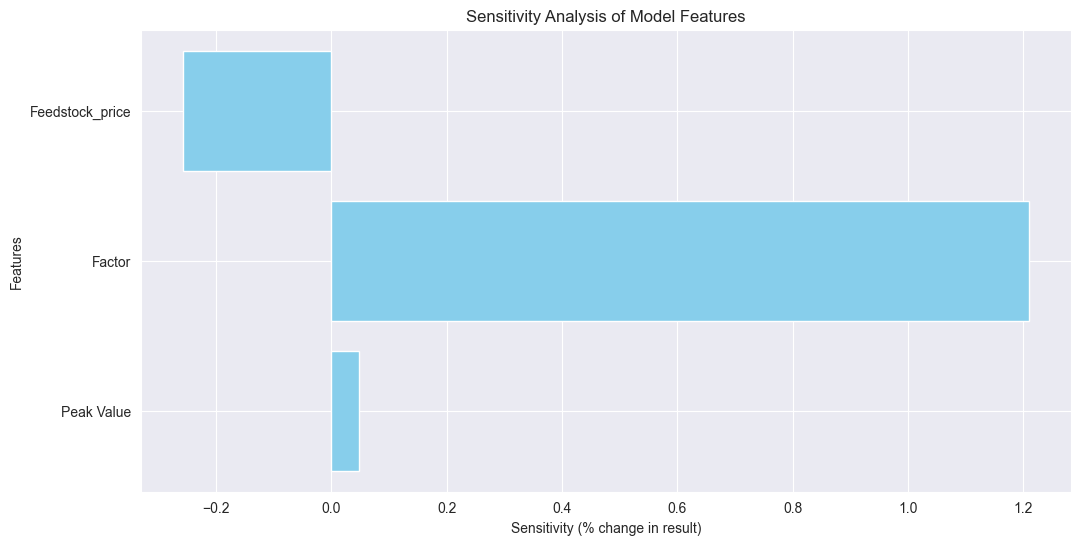

In [23]:


# Get the baseline values (mean of each feature)
baseline_values = X_poly_df.min().values

# Perform sensitivity analysis
sensitivities = sensitivity_analysis(model, X_poly_df, X_poly_df.columns, baseline_values)

# Print the sensitivity results
print("\nSensitivity Analysis Results (1% change in features):")
for feature, sensitivity in sensitivities.items():
    print(f"{feature}: {sensitivity:.2f}%")

# Optional: Visualize Sensitivity
features = list(sensitivities.keys())
values = list(sensitivities.values())

plt.figure(figsize=(12, 6))
plt.barh(features, values, color='skyblue')
plt.xlabel('Sensitivity (% change in result)')
plt.ylabel('Features')
plt.title('Sensitivity Analysis of Model Features')
plt.savefig("C:/Users/Eduar/Desktop/images_report/sensibility analysis 2.png")
plt.show()